### Don't change any cell that begins with DNC!  These are here to separate sections so we can grade the assignment more easily.

#### Add your imports in the cell below here

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import numpy as np
import math
%matplotlib inline

## DNC: Begin Part 1

### Part 1: Basic Data Visualization 

#### Plotting x-y data

* Use the HCEPDB file to create a single 4x4 composite plot (_not 4 separate figures_).  The plots should contain the following data
    * Upper-left: PCE vs VOC
    * UR: PCE vs JCS
    * LL: E_HOMO vs VOC
    * LR: E_LUMO vs PCE 

* You should make the plots the highest quality possible and, in your judgement, ready for inclusion in a formal report or publication. 

* In the cell after you are finished making the plot add a markdown cell and add the following information 
    * There are five terms above from the HCEPDB that relate to photovoltaic materials - define them as they pertain to molecules that could be used for energy conversion applications 
    
    * Briefly explain the changes you made from the default plot and why you made them 
    


In [32]:
df = pd.read_csv('HCEPD_100K.csv')
df.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


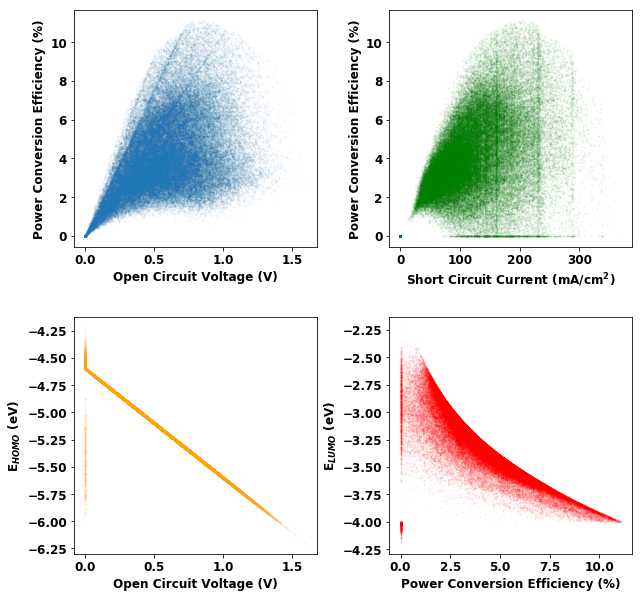

In [35]:
fig = plt.figure(figsize=[10, 10])

#Creating the suplot for PCE vs. VOC
plt.subplot(2, 2, 1)
plt.scatter(df['voc'], df['pce'], alpha = 0.05, s = 1)
plt.xlabel('Open Circuit Voltage (V)')
plt.ylabel('Power Conversion Efficiency (%)')

#Creating the subplot for PCE vs. JSC
plt.subplot(2, 2, 2)
plt.scatter(df['jsc'], df['pce'], c = 'g', alpha = 0.05, s = 1)
plt.xlabel('Short Circuit Current (mA/cm$^2$)')
plt.ylabel('Power Conversion Efficiency (%)')

#Creating the subplot for E_HOMO vs. VOC
plt.subplot(2, 2, 3)
plt.scatter(df['voc'], df['e_homo_alpha'], c = 'orange', alpha = 0.05, s = 1)
plt.xlabel('Open Circuit Voltage (V)')
plt.ylabel('E$_{HOMO}$ (eV)')

#Creating the subplot for E_LUMO vs. PCE
plt.subplot(2, 2, 4)
plt.scatter(df['pce'], df['e_lumo_alpha'], c = 'red', alpha = 0.05, s = 1)
plt.xlabel('Power Conversion Efficiency (%)')
plt.ylabel('E$_{LUMO}$ (eV)')

#adjusting space between subplots
fig = plt.subplots_adjust( wspace = 0.3, hspace = 0.3)

#Adding some other style touches
fig = plt.rcParams ['font.size'] = 12
fig = plt.rcParams ['font.weight'] = 'bold'
fig = plt.rcParams ['axes.labelweight'] = 'bold'

### For some reason, when you run this code for the first time the style changes I made to the plots don't show up, but when you run a second time they do (The bold labels, numbers). I'm not sure why but just wanted to point that out. Also, %matplotlib inline doesn't seem to be working.

### Changes I made to the default plot included bold labels and axes to stand out better, and lowering the alpha value and marker size to make trends in the heavily congested data more visable. 

#### PCE = Power Conversion Efficiency
The power conversione efficiency is the most common evaluation of a solar cells efficiency. This can depend heavily on the photoconductivity of the molecule itself.

#### VOC = Open Circuit Voltage
The open circuit voltage is the maximum possible obtainable voltage from a solar cell at zero current. I am not too familar with solar cells, but in my battery research the open circuit voltage of the battery is determiend by the redox potential of the organic molecules. A molecules redox potential can shift drastically due to the addition of certain fucntional groups, and also the position of the functional group. I assume something loosely related to this happens to the molecules used for a solar cell as well. 

#### JSC = Short-Circuit Current

The short-circuit current is the current in a solar cell when the voltage is zero. This is the maxiumum current that can be drawn from the solar cell. This value depends on the generation and collection of light from the solar cell, which can probably be traced back to the photoconductivity of the molecules used in the solar cell. 

#### E_HOMO = Energy of Highest Occupied Molecular Orbital
#### E_LUMO = Energy of Lowest Unoccupied Molecular Orbital

The HOMO and LUMO energy values are important in organic solar cells due to the fact that the bandgap between these energy orbitals determines what wavelengths of light can be absorbed by the moelcules in the solar cell.

## DNC: Begin Part 2

### Part 2: Contour plots of a free energy surface

* Use the `ALA2fes.dat` file to create a contour plot of the alanine dipeptide $\Phi$ vs $\Psi$ free-energy surface. Guidelines and information: 
    * The energy scale in the data input file is on kJ/mol and the free-energy surface (FES) was collected at a temperature of 300K: 
    * You should create a contour plot that draws contour lines spaced every kT in energy and stops drawing contours once all of the features can be clearly seen. 
        * This is a slightly different visualization than what we drew in class which used shaded coloring to draw the contours 
    * Annotate the cell so I can follow all the steps you are doing. The final energy plot need not be in kJ/mol (you can convert it to other energy or use units of kT if you prefer.
    * Make sure to have titles, axis labels, something that denotes the value of the contours
    * Optional but encouraged, use greek letters for the axes labels

In [4]:
column_names = ['phi', 'psi', 'fes', 'der_phi', 'der_psi']
data_ALA  = pd.read_csv('ALA2fes.dat', sep = '\s+', header = None, skiprows = 9, names = column_names)
data_ALA.head()

,phi,psi,fes,der_phi,der_psi
0,-3.141593,-3.141593,4.838919,-20.089106,7.045216
1,-3.015929,-3.141593,2.726201,-14.287727,7.912178
2,-2.890265,-3.141593,1.471803,-6.391128,8.497256
3,-2.764602,-3.141593,1.242827,1.404448,9.011949
4,-2.638938,-3.141593,1.839741,6.653277,9.628476


In [5]:
#Checking data shape is correct, had some issues previously, looks good now.
data_ALA.shape

(2500, 5)

Text(0.5, 1.0, 'Contour plot of $\\Psi$ vs. $\\Phi$')

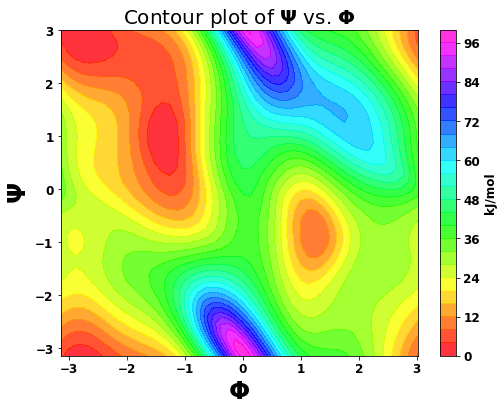

In [56]:
# need to convert the data into arrays

#creating numpy array for phi, need to reshape the data, 2500 total data sets but they are repeated 50 times. Only need 50.
phi = np.array(data_ALA['phi'])
phi_reshape = np.reshape(phi, (50, 50))

#creating numpy array for psi and reshaping data
psi = np.array(data_ALA['psi'])
psi_reshape = np.reshape(psi, (50, 50))

#creating numpy array for fes and reshaping data
fes = np.array(data_ALA['fes'])
fes_reshape = np.reshape(fes, (50, 50))


#Label phi, psi, and fes as X, Y, and Z arrays. For X and Y, need to call on the first columna and first row. 
X = phi_reshape[0, :]
Y = psi_reshape[:, 0]
Z = fes_reshape

#creating the figure
fig = plt.figure(figsize=[8, 6]) 

#makes the contour plot
plt.contourf(X, Y, Z, (25), cmap = 'gist_rainbow', alpha = 0.8 ) 

#inserts a colorbar for the contour plot
CLB = plt.colorbar() 
CLB.ax.set_ylabel('kJ/mol') 

# Labels, titles
plt.xlabel(r'$\Phi$', fontsize = 25)
plt.ylabel(r'$\Psi$', fontsize = 25)
plt.title('Contour plot of $\Psi$ vs. $\Phi$', fontsize= 20)


### The only part of this I didn't quite udnerstand was spacing the contour lines evert kT units. I just picked 25 as the spacing.